<a href="https://colab.research.google.com/github/Chaithu1414/AIML-2025/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
df = pd.read_csv('/content/student_coding_activity.csv')
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

First 5 rows:
   Student_ID   Coding_Hours Programming_Language Projects_Completed  \
0           1      15 Python                  NaN              3 Yes   
1           2        20 Java                  NaN              5 Yes   
2           3            NaN                  C++               2 No   
3           4      10 Python                  NaN               1 No   
4           5  25 JavaScript                  NaN              4 Yes   

  Internship_Status  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

Last 5 rows:
    Student_ID   Coding_Hours Programming_Language Projects_Completed  \
25          26        20 Java                  NaN              4 Yes   
26          27            NaN               Python               2 No   
27          28         18 C++                  NaN              3 Yes   
28          29  22 JavaScript                  NaN              5 Yes   
29          30      15 Python             

Handle Missing Values
We will fill missing values in Coding_Hours with the median and Projects_Completed with the mean. For categorical variables like Programming_Language and Internship_Status, we will fill missing values with the mode

In [3]:
import pandas as pd
df = pd.read_csv('/content/student_coding_activity.csv')
df['Coding_Hours_Numeric'] = pd.to_numeric(df['Coding_Hours'].str.extract('(\d+)')[0], errors='coerce')
df['Coding_Hours_Numeric'].fillna(df['Coding_Hours_Numeric'].median(), inplace=True)
df['Coding_Hours'] = df['Coding_Hours_Numeric']
df.drop(columns=['Coding_Hours_Numeric'], inplace=True)
print("\nMissing values after handling:\n", df.isnull().sum())


Missing values after handling:
 Student_ID               0
Coding_Hours             0
Programming_Language    25
Projects_Completed       3
Internship_Status       27
dtype: int64


<ipython-input-3-a0acb87afb91>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Coding_Hours_Numeric'].fillna(df['Coding_Hours_Numeric'].median(), inplace=True)


We will use label encoding for categorical variables.

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Programming_Language'] = label_encoder.fit_transform(df['Programming_Language'])
df['Internship_Status'] = label_encoder.fit_transform(df['Internship_Status'])
print("\nDataFrame after encoding:\n", df.head())



DataFrame after encoding:
    Student_ID  Coding_Hours  Programming_Language Projects_Completed  \
0           1          15.0                     3              3 Yes   
1           2          20.0                     3              5 Yes   
2           3          19.0                     0               2 No   
3           4          10.0                     3               1 No   
4           5          25.0                     3              4 Yes   

   Internship_Status  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2  


In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df['Projects_Completed_Numeric'] = pd.to_numeric(df['Projects_Completed'].str.extract('(\d+)')[0], errors='coerce')
df['Projects_Completed_Numeric'].fillna(df['Projects_Completed_Numeric'].median(), inplace=True)
df['Projects_Completed'] = df['Projects_Completed_Numeric']
df.drop(columns=['Projects_Completed_Numeric'], inplace=True)
scaler = MinMaxScaler()
df[['Coding_Hours', 'Projects_Completed']] = scaler.fit_transform(df[['Coding_Hours', 'Projects_Completed']])
print("\nDataFrame after normalization:\n", df.head())


DataFrame after normalization:
    Student_ID  Coding_Hours  Programming_Language  Projects_Completed  \
0           1          0.30                     3               0.375   
1           2          0.55                     3               0.625   
2           3          0.50                     0               0.250   
3           4          0.05                     3               0.125   
4           5          0.80                     3               0.500   

   Internship_Status  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2  


<ipython-input-5-13bb55fd9aeb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Projects_Completed_Numeric'].fillna(df['Projects_Completed_Numeric'].median(), inplace=True)


We will save the cleaned dataset to a new CSV file.


In [6]:
# Save the cleaned dataset
df.to_csv('student_cleaned_coding_activity.csv', index=False)
print("Cleaned dataset saved as 'student_cleaned_coding_activity.csv'.")


Cleaned dataset saved as 'student_cleaned_coding_activity.csv'.


We will save the cleaned dataset to a new CSV file.

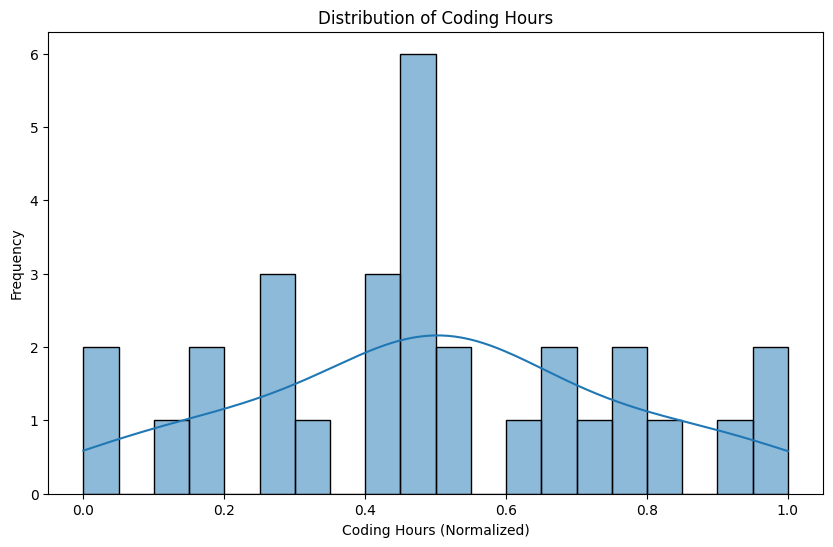

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Coding_Hours'], bins=20, kde=True)
plt.title('Distribution of Coding Hours')
plt.xlabel('Coding Hours (Normalized)')
plt.ylabel('Frequency')
plt.show()


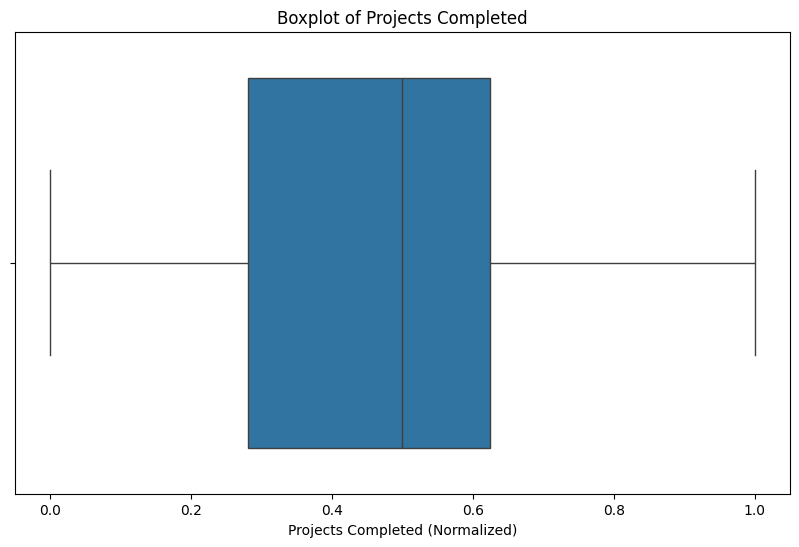

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Projects_Completed'])
plt.title('Boxplot of Projects Completed')
plt.xlabel('Projects Completed (Normalized)')
plt.show()


This Python code snippet creates a boxplot to visualize outliers in the number of projects completed. Let's break it down step by step


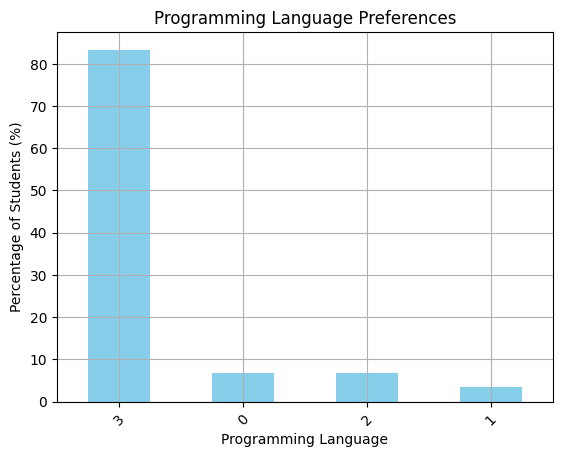

In [9]:
## 3. Programming Language Preferences
language_counts = df['Programming_Language'].value_counts(normalize=True) * 100
language_counts.plot(kind='bar', color='skyblue')
plt.title('Programming Language Preferences')
plt.xlabel('Programming Language')
plt.ylabel('Percentage of Students (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [10]:
skewness = df['Coding_Hours'].skew()
print(f"Skewness of Coding Hours: {skewness}")


Skewness of Coding Hours: 0.010949827032855474


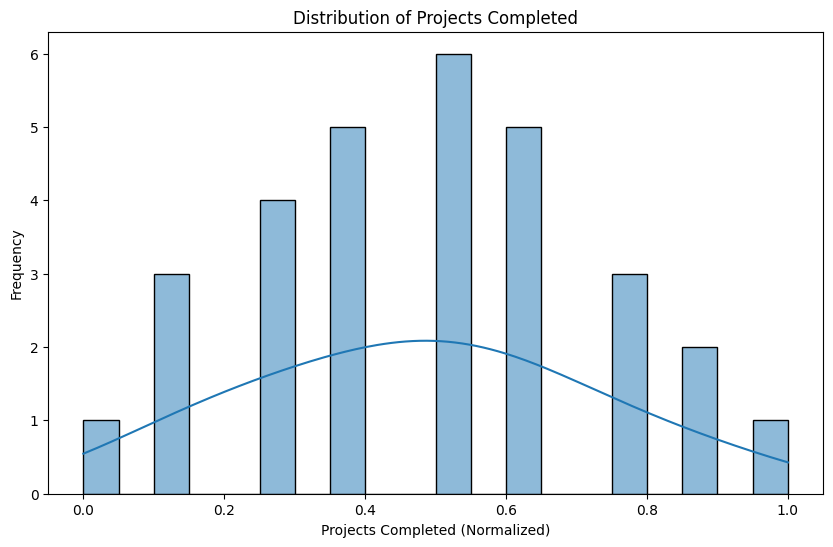

Normality Test Value: 0.05946180555555555


In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Projects_Completed'], bins=20, kde=True)
plt.title('Distribution of Projects Completed')
plt.xlabel('Projects Completed (Normalized)')
plt.ylabel('Frequency')
plt.show()

normality_test = df['Projects_Completed'].apply(lambda x: (x - df['Projects_Completed'].mean()) ** 2).sum() / len(df)
print(f"Normality Test Value: {normality_test}")


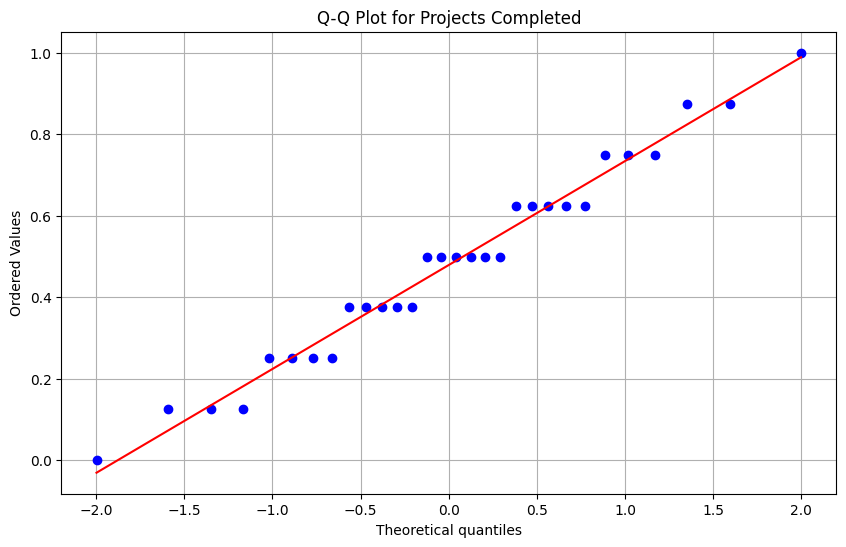

In [12]:
# Check for normality using Q-Q plot
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(df['Projects_Completed'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Projects Completed')
plt.grid()
plt.show()

In [13]:
# Normalize Coding_Hours and Projects_Completed
scaler = MinMaxScaler()
df[['Coding_Hours', 'Projects_Completed']] = scaler.fit_transform(df[['Coding_Hours', 'Projects_Completed']])

In [14]:
# Export the cleaned dataset
df.to_csv('student_cleaned_coding_activity.csv', index=False)

In [15]:
#Step 5: Save the Student Dataset
df.to_csv('/student_coding_activity.csv', index=False)
# Confirm the file is saved
print("student dataset saved as 'cleaned_data.csv'.")

student dataset saved as 'cleaned_data.csv'.
